In [47]:
from linearAdjust import linAdj
from fit_leastsq import fit_leastsq
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from sympy import *

In [48]:
x_exp1, y_exp1 = np.loadtxt(fname="datos1.csv", delimiter= ',', unpack=True, usecols=(0,1), skiprows=0)
x_exp2, y_exp2 = np.loadtxt(fname="datos2.csv", delimiter= ',', unpack=True, usecols=(0,1), skiprows=5)

In [49]:
n = len(x_exp1)
pend1, inter1, Dm1, Db1, r1, Dy1 = linAdj(x_exp1, y_exp1, n)

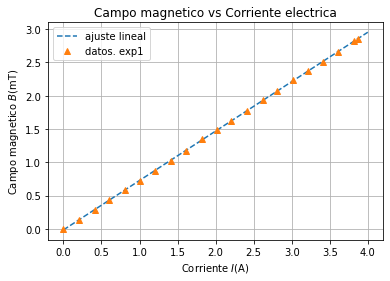

In [50]:
x_teo1 = np.linspace(0,4,100) 
y_teo1 = pend1 * x_teo1 + inter1


plt.title("Campo magnetico vs Corriente electrica")
plt.plot(x_teo1, y_teo1, '--', label = "ajuste lineal")
plt.plot(x_exp1,y_exp1, '^', label = "datos. exp1")
plt.grid()
plt.xlabel("Corriente $I$(A)")
plt.ylabel("Campo magnetico $B$(mT)")
plt.legend()
plt.show()

In [51]:
print("pendiente: ","(",round(pend1,3),"+-",round(Dm1,3),") mT/A")
print("intercepto: ","(",round(inter1,3),"+-",round(Db1,3),") mT")
print("R: ", r1)
print("Dy1: ", Dy1)

pendiente:  ( 0.742 +- 0.001 ) mT/A
intercepto:  ( -0.016 +- 0.001 ) mT
R:  0.9999760191580439
Dy1:  0.006502322787462707


In [52]:
n = len(x_exp2)
pend2, inter2, Dm2, Db2, r2, Dy2 = linAdj(x_exp2, y_exp2, n)

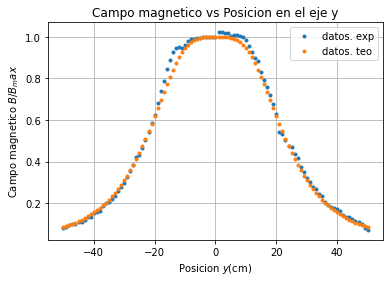

In [53]:
plt.title("Campo magnetico vs Posicion en el eje y")
plt.plot(x_exp2, y_exp2 / y_exp2[50], '.', label = "datos. exp")

plt.grid()
plt.xlabel("Posicion $y$(cm)")
plt.ylabel("Campo magnetico $B/B_max$")

#[u]=N/A**2,
#[a] = cm,
#[I] = A

u, N, a, I = 4 * pi * 10**(-7), 124, 20, 2.5

const = u * N * (a**2) * I / 2

teoB1 = 1 / ( ((x_exp2 + a / 2)**2 + a**2 )**(3/2) )
teoB2 = 1 / ( ((x_exp2 - a / 2)**2 + a**2 )**(3/2) )
teoB = teoB1 + teoB2

plt.plot(x_exp2, teoB / teoB[50] , '.', label = "datos. teo")



plt.legend()
plt.show()

# Efecto Hall

## Campo vs Corriente

Como varia el campo a partir de la corriente

In [54]:
CampoB, CorrienteI = np.loadtxt(fname="DatosAjusteCampoB.csv", delimiter=',',skiprows=1, unpack=True)
CorrienteI

array([0.  , 0.03, 0.22, 0.84, 1.3 , 1.83, 2.36, 2.99, 3.57, 3.9 , 4.05,
       4.36, 4.4 , 4.68, 4.9 , 4.94, 4.56])

In [55]:
pendB, interB, DmB, DbB, rB, DyB = linAdj(CorrienteI, CampoB, len(CorrienteI))
print("Pendiente: ","(",round(pendB,1),"+-",round(DmB,1),") mT/A")
print("Intercepto: ","(",round(interB,1),"+-",round(DbB,1),") mT")

Pendiente:  ( -104.8 +- 3.6 ) mT/A
Intercepto:  ( -49.9 +- 6.4 ) mT


El campo $B$ tiene una relacion lineal con la corriente $I$ aplicada al solenoide. A partir de la relacion lineal calculamos $B$ cuando $I_0=2.54 \mathrm{A}$

In [56]:
CampoEnI = lambda B: pendB * B + interB
I_0 = 2.54 #A
B_0 = CampoEnI(I_0)
DB_0 = DmB * 2.54 + DbB
print("Campo constante: ","(",round(B_0),"+-",round(DB_0),") mT")

Campo constante:  ( -316 +- 16 ) mT


$B=(-316 \pm 16) \mathrm{mT}$

## Plata

El voltaje $V_H$ hall en la placa varia con la corriente $I$ aplicada a esta de acuerdo con la siguiente ecuacion

$V_H = \frac{1}{new}IB$.

La pendiente de la recta corresponde entonces a $\frac{B}{new}$.

* $B=(-316 \pm 16) \mathrm{mT}$
* $e = -1.6 \cdot 10^{-19} \mathrm{C}$
* $w = 50.0 \mathrm{\mu m}$
* $[n] = cm^{-3}$

In [57]:
VH_Ag_exp, I_Ag_exp = np.loadtxt(fname="efectoHall.csv", delimiter=",", skiprows=4, unpack=True, max_rows=27-4)
VH_Ag_exp *= 10**6 #Unidades microVolts
I_Ag_exp *= -1
VH_Ag_exp

array([  0. ,  -0.5,  -0.6,  -1.3,  -2.3,  -2.9,  -3.8,  -5.3,  -6.2,
        -7.2,  -8.5,  -9.5, -10.4, -11.2, -12.5, -13.5, -15.4, -16. ,
       -17.5, -19.3, -20.8, -22. , -22.2])

In [58]:
n = len(I_Ag_exp)
pendAg, interAg, DmAg, DbAg, rAg, DyAg = linAdj(I_Ag_exp, VH_Ag_exp, n)
print("V_H / I = B / (n*e*w): ","(", round(pendAg,3)," +-",round(DmAg,3),") uV/A")
print("Intercepto: ","(", round(interAg,3)," +-",round(DbAg,3),") uV")

V_H / I = B / (n*e*w):  ( -10.104  +- 0.053 ) uV/A
Intercepto:  ( 0.078  +- 0.037 ) uV


$\frac{B}{new} = (-10.104 \pm 0.053) \mu V / A$

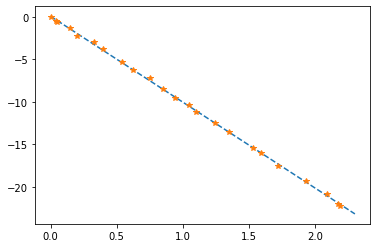

In [59]:
I_Ag_teo = np.linspace(0,2.3)
VH_Ag_teo = pendAg * I_Ag_teo + interAg

plt.plot(I_Ag_teo, VH_Ag_teo, '--')
plt.plot(I_Ag_exp, VH_Ag_exp, '*')

La pendiente $m$ corresponde a
$m = \frac{B}{new}$

$n =  \frac{B}{mew}$

Para que $n$ de en $cm^{-3}$ hay que multiplicar el resultado por un factor de $10^{-3}$ al resultado obtenido de reemplazar en la ecuacion las cantidades con las unidades de arriba.

* $[m] = \mu \mathrm{V/A}$

In [75]:
#m = B / new  =>  n = B / mew
e = 1.6 * 10**(-19) #Unidades: Coulombs
wAg = 50 #unidades:  (1.5 cm)
mAg = pendAg #T
DmAgn = DmAg * 10**(-6) #T
nAg = B_0 / (pendAg * e * wAg)
DnAg = abs((nAg/mAg) * DmAgn)
#print("densidad de portadores de carga: ","(",round(nAg / 10**(20),4),"+-",round(DnAg / 10**(20),4),") * 10^20 m-3")
nAg * 10**3

3.910156770518313e+21

In [61]:
#Z = n * A / (N_A * rho)
A_Ag = 107.8683 #g / mol
N_A = 6.02214076 * 10**(23) #1/mol
rho_Ag = 10.4743 #g/cm3
rho_Ag = rho_Ag * 10**(0) #g/m3
Z_Ag = nAg * A_Ag / (N_A * rho_Ag)
Z_Ag

-330.88182542992143

### Calculo de la desindad de unidades de carga a partir de las propiedades del material

$n=\frac{Z N_A \rho}{A}$

* $N_A = 6.0225 \times 10^{23} mol^{-1}$.
* $\rho = 10.4743 g/cm^3$
* $A = 107.87 g\cdot mol^{-1}$
* $Z = 1$

In [62]:
Z_Ag = 1
N_A = 6.0225 * 10**23
rho_Ag = 10.4743
A = 107.87

n = Z_Ag * N_A * rho_Ag / A
print(n)

5.847916172244368e+22


$n = 5.85 \times 10^{22} cm^{-3}$

## Cobre

In [63]:
VH_Cu_exp, I_Cu_exp = np.loadtxt(fname="efectoHall.csv", delimiter=",", skiprows=31, unpack=True)
VH_Cu_exp *= 10**6 #Unidades microVolts
I_Cu_exp *= -1  #Unidades Amperios
VH_Cu_exp

array([ 0. , -0.2, -0.2, -0.2, -0.1,  0.1,  0.2,  0.3,  0.5,  0.6,  0.8,
        0.9,  1.2,  1.4])

In [64]:
n = len(I_Cu_exp)
pendCu, interCu, DmCu, DbCu, rCu, DyCu = linAdj(I_Cu_exp, VH_Cu_exp, n)
print("Pendiente: ","(", round(pendCu * 10,3)," +-",round(DmCu * 10,3),") * 10^-1 uV/A")
print("Intercepto: ","(", round(interCu * 10,3)," +-",round(DbCu*10,3),") * 10^-1 uV")

Pendiente:  ( 7.73  +- 0.529 ) * 10^-1 uV/A
Intercepto:  ( -3.111  +- 0.343 ) * 10^-1 uV


In [65]:
#m = B / new  =>  n = B / mew
e = 1.6 * 10**(-19) #Unidades: Coulombs
wCu = 1.5 * 10**(-2) #unidades: metros    (1.5 cm)
B = 2.24 * 10**(-3)  #Unidades teslas   (2.24 mT)
mCu = pendCu * 10**(-6) #T
DmCun = DmCu * 10**(-6) #T
nCu = B / (pendCu * e * mCu) #Unidades:  metro**(-3)
DnCu = abs((nCu/mCu) * DmCun)
print("densidad de portadores de carga: ","(",round(nCu / 10**(22),2),"+-",round(DnCu / 10**(22),2),") * 10^22 m-3")

densidad de portadores de carga:  ( 2.34 +- 0.16 ) * 10^22 m-3


In [66]:
#Z = n * A / (N_A * rho)
A_Cu = 63.54 #g / mol
N_A = 6.02214076 * 10**(23) #1/mol
rho_Cu = 8.89 #g/cm3
rho_Cu = rho_Cu * 10**(6) #g/m3
Z_Cu = nCu * A_Cu / (N_A * rho_Cu)
Z_Cu

2.7806753803381537e-07

In [67]:
6.0225 * 10 **(23) * 8.89 / 63.54

8.426192162417375e+22

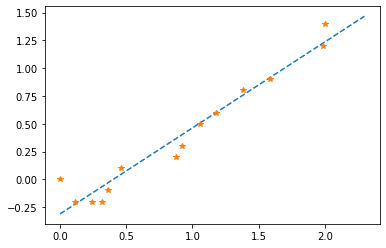

In [68]:
I_Cu_teo = np.linspace(0,2.3)
VH_Cu_teo = pendCu * I_Cu_teo + interCu

plt.plot(I_Cu_teo, VH_Cu_teo, '--')
plt.plot(I_Cu_exp, VH_Cu_exp, '*')

In [69]:
print("Probando")

Probando
